In [1]:
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<>:1: SyntaxWarning: invalid escape sequence '\G'
<>:1: SyntaxWarning: invalid escape sequence '\G'
C:\Users\Galan\AppData\Local\Temp\ipykernel_17236\2250977813.py:1: SyntaxWarning: invalid escape sequence '\G'
  img = cv2.imread("D:\Galan\Semester 5\Pengolahan Data Tidak Terstruktur\Latihan\dog.4053.jpg") # Adjust the path as necessary


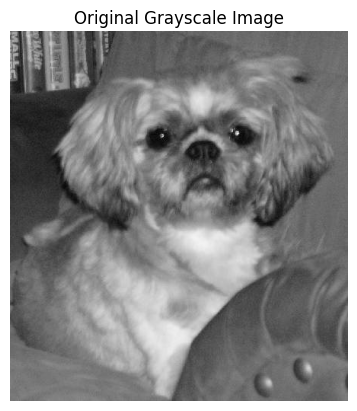

In [5]:
img = cv2.imread("D:\Galan\Semester 5\Pengolahan Data Tidak Terstruktur\Latihan\dog.4053.jpg") # Adjust the path as necessary

if img is None:
	raise FileNotFoundError("Image file not found. Please check the path.")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')
plt.show()

## Image Filters

Image filters adalah teknik dalam pengolahan citra digital yang melibatkan penggunaan kernel atau matriks kecil untuk memodifikasi nilai piksel dalam citra. Filter ini digunakan untuk berbagai tujuan, seperti mengurangi noise, meningkatkan tepi, atau menerapkan efek artistik. Berikut adalah beberapa jenis filter umum yang sering digunakan dalam pengolahan citra:
1. Smoothing Filters (Low-pass filters)
2. Sharpening Filters (High-pass filters)
3. Edge Detection Filters
4. Embossing Filters
5. Custom Convolution Filters

### Filter Kernel

Filter kernel adalah matriks kecil yang digunakan dalam operasi konvolusi untuk memodifikasi nilai piksel dalam citra. Kernel ini diterapkan pada setiap piksel citra dengan cara mengalikan nilai piksel tetangga dengan nilai kernel yang sesuai, kemudian menjumlahkan hasilnya untuk mendapatkan nilai baru piksel tersebut. Kernel dapat memiliki berbagai ukuran dan bentuk, tergantung pada efek yang diinginkan.

#### Perbedaan Filter dan Point Operations
| Aspek                  | Filter Kernel                                   | Point Operations                             |
|-----------------------|-------------------------------------------------|----------------------------------------------|
| Definisi              | Menggunakan kernel untuk memodifikasi piksel berdasarkan tetangga | Memanipulasi nilai piksel secara individual tanpa mempertimbangkan tetangga |
| Operasi              | Melibatkan konvolusi dengan kernel             | Melibatkan operasi matematis langsung pada piksel |
| Efek pada Citra      | Mempengaruhi area sekitar piksel				  | Mempengaruhi hanya piksel itu sendiri         |
| Contoh                | Gaussian Blur, Sharpening, Edge Detection | Brightness Adjustment, Contrast Adjustment    |

#### Linear Filters
Linear filters adalah jenis filter yang menggunakan operasi linear pada nilai piksel dan tetangganya. Contoh umum dari linear filters adalah smoothing filters (seperti Gaussian blur) dan sharpening filters. Linear filters mempertahankan hubungan linear antara input dan output, sehingga efeknya dapat diprediksi dan dianalisis dengan mudah.


1. MATRIX PIXEL INPUT (7x7):


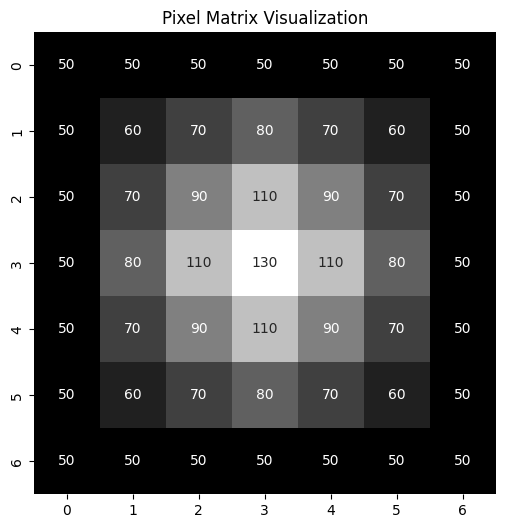

In [3]:
# Matrix pixel input (7x7)
pixel_matrix = np.array([
    [50,  50,  50,  50,  50,  50,  50],
    [50,  60,  70,  80,  70,  60,  50],
    [50,  70,  90, 110,  90,  70,  50],
    [50,  80, 110, 130, 110,  80,  50],
    [50,  70,  90, 110,  90,  70,  50],
    [50,  60,  70,  80,  70,  60,  50],
    [50,  50,  50,  50,  50,  50,  50]
], dtype=np.float32)

print("\n1. MATRIX PIXEL INPUT (7x7):")

# Visualisasi matrix pixel
plt.figure(figsize=(6, 6))
sns.heatmap(pixel_matrix, annot=True, fmt=".0f", cmap="gray", cbar=False, square=True)
plt.title("Pixel Matrix Visualization")
plt.show()


2a. AVERAGE/BOX BLUR KERNEL (3x3):


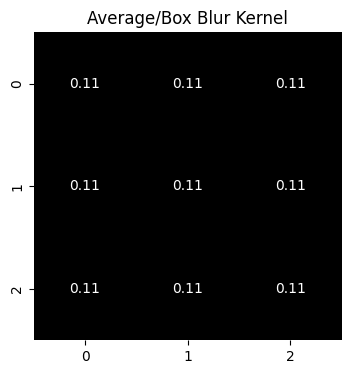

In [4]:
# 2. Definisikan berbagai kernel filter (3x3)
# a. Average/Box Blur Kernel
average_kernel = np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
], dtype=np.float32) / 9

print("\n2a. AVERAGE/BOX BLUR KERNEL (3x3):")

# Visualisasi kernel
plt.figure(figsize=(4, 4))
sns.heatmap(average_kernel, annot=True, fmt=".2f", cmap="gray", cbar=False, square=True)
plt.title("Average/Box Blur Kernel")
plt.show()


Contoh Konvolusi pada Piksel Tengah [3, 3]:
Nilai Piksel Asli: 130

Region of Interest (ROI) 3x3:


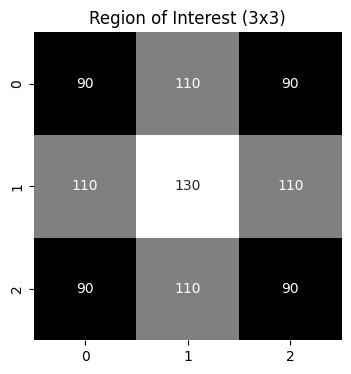

In [5]:
# Contoh detail konvolusi pada satu piksel (tengah matrix)
center_i, center_j = 3, 3
print(f"\nContoh Konvolusi pada Piksel Tengah [{center_i}, {center_j}]:")
print(f"Nilai Piksel Asli: {pixel_matrix[center_i, center_j]:.0f}")

# Ambil ROI 3x3 di sekitar piksel tengah
roi = pixel_matrix[center_i-1:center_i+2, center_j-1:center_j+2]
print(f"\nRegion of Interest (ROI) 3x3:")

# Visualisasi ROI
plt.figure(figsize=(4, 4))
sns.heatmap(roi, annot=True, fmt=".0f", cmap="gray", cbar=False, square=True)
plt.title("Region of Interest (3x3)")
plt.show()


Konvolusi dengan Average Kernel:
ROI × Kernel:


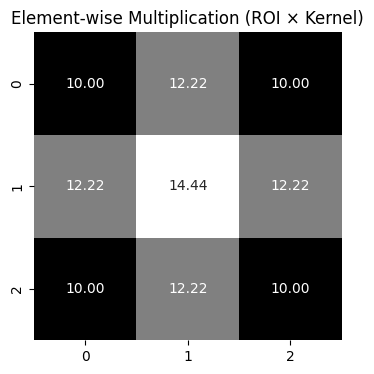

Sum (Hasil Konvolusi): 103.33


In [6]:
# Hitung konvolusi dengan Average Kernel
print(f"\nKonvolusi dengan Average Kernel:")
print("ROI × Kernel:")
element_wise = roi * average_kernel

# Visualisasi element-wise multiplication
plt.figure(figsize=(4, 4))
sns.heatmap(element_wise, annot=True, fmt=".2f", cmap="gray", cbar=False, square=True)
plt.title("Element-wise Multiplication (ROI × Kernel)")
plt.show()

result = np.sum(element_wise)
print(f"Sum (Hasil Konvolusi): {result:.2f}")


Ukuran Matrix Pixel: 7x7
Ukuran Kernel: 3x3
Padding yang Dibutuhkan: Height=1, Width=1


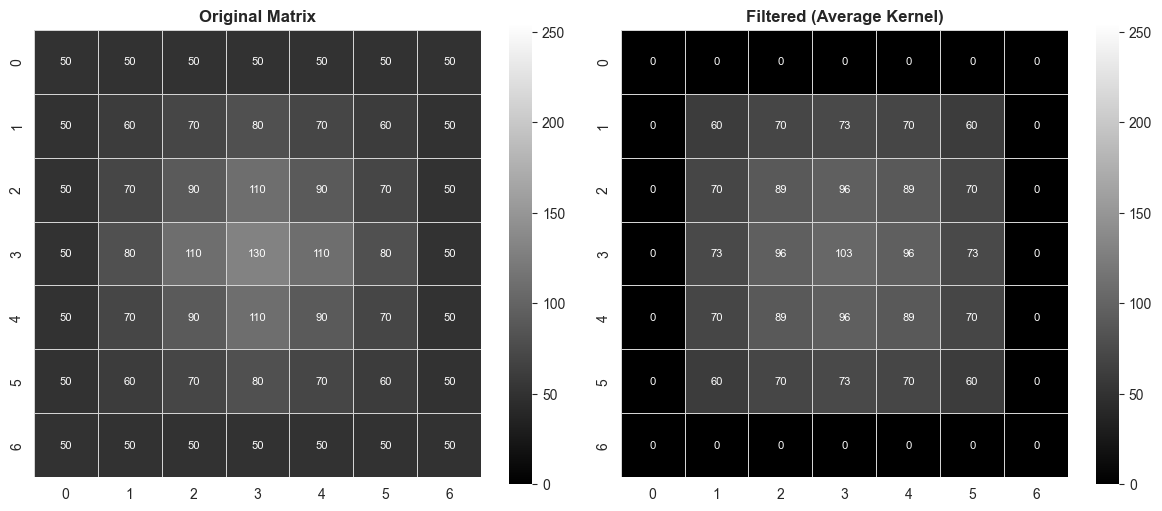

In [7]:
# Terapkan filter ke seluruh matrix pixel menggunakan konvolusi manual
img_height, img_width = pixel_matrix.shape
print(f"\nUkuran Matrix Pixel: {img_height}x{img_width}")
kernel_height, kernel_width = average_kernel.shape
print(f"Ukuran Kernel: {kernel_height}x{kernel_width}")

# Hitung padding yang dibutuhkan
pad_h = kernel_height // 2
pad_w = kernel_width // 2
print(f"Padding yang Dibutuhkan: Height={pad_h}, Width={pad_w}")

# Buat output matrix dengan ukuran yang sama dengan input
output = np.zeros_like(pixel_matrix)

# Lakukan konvolusi manual
for i in range(pad_h, img_height - pad_h):
    for j in range(pad_w, img_width - pad_w):
        # Ambil region of interest (ROI)
        roi = pixel_matrix[i-pad_h:i+pad_h+1, j-pad_w:j+pad_w+1]
        
        # Element-wise multiplication dan sum
        output[i, j] = np.sum(roi * average_kernel)


# Original
# Create figure with seaborn style
sns.set_style("white")
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original
sns.heatmap(pixel_matrix, annot=True, fmt='.0f', cmap='gray', cbar=True, 
            ax=axes[0], square=True, linewidths=0.5, linecolor='lightgray',
            vmin=0, vmax=255, annot_kws={"size": 8, "color": "white"})
axes[0].set_title('Original Matrix', fontsize=12, fontweight='bold')
axes[0].set_xlabel('')
axes[0].set_ylabel('')

# Filtered
sns.heatmap(output, annot=True, fmt='.0f', cmap='gray', cbar=True, 
            ax=axes[1], square=True, linewidths=0.5, linecolor='lightgray',
            vmin=0, vmax=255, annot_kws={"size": 8, "color": "white"})
axes[1].set_title('Filtered (Average Kernel)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

In [8]:
def manual_convolution(image, kernel):
    """
    Melakukan konvolusi manual antara image dan kernel
    """
    # Ukuran image dan kernel
    img_height, img_width = image.shape
    kernel_height, kernel_width = kernel.shape
    
    # Hitung padding yang dibutuhkan
    pad_h = kernel_height // 2
    pad_w = kernel_width // 2
    
    # Buat output matrix dengan ukuran yang sama dengan input
    output = np.zeros_like(image)
    
    # Lakukan konvolusi
    for i in range(pad_h, img_height - pad_h):
        for j in range(pad_w, img_width - pad_w):
            # Ambil region of interest (ROI)
            roi = image[i-pad_h:i+pad_h+1, j-pad_w:j+pad_w+1]
            
            # Element-wise multiplication dan sum
            output[i, j] = np.sum(roi * kernel)
    
    return output

def visualize_comparison(original, output):
    sns.set_style("white")
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Original
    sns.heatmap(original, annot=True, fmt='.0f', cmap='gray', cbar=True, 
                ax=axes[0], square=True, linewidths=0.5, linecolor='lightgray',
                vmin=0, vmax=255, annot_kws={"size": 8, "color": "white"})
    axes[0].set_title('Original Matrix', fontsize=12, fontweight='bold')
    axes[0].set_xlabel('')
    axes[0].set_ylabel('')

    # Filtered
    sns.heatmap(output, annot=True, fmt='.0f', cmap='gray', cbar=True, 
                ax=axes[1], square=True, linewidths=0.5, linecolor='lightgray',
                vmin=0, vmax=255, annot_kws={"size": 8, "color": "white"})
    axes[1].set_title('Filtered (Average Kernel)', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('')
    axes[1].set_ylabel('')

    plt.tight_layout()
    plt.show()

#### Latihan

Buat matrix piksel 10x10 dengan nilai random antara 0-255, kemudian terapkan filter dengan matrix berikut ini:

```
Filter Kernel:
┌─                 ─┐
| 0.075 0.125 0.075 |
| 0.125 0.200 0.125 |
| 0.075 0.125 0.075 |
└─                 ─┘
```
Visualisasikan matrix original, matrix filter, dan matrix hasil filter menggunakan heatmap dari seaborn.

In [9]:
# Tulis kode di sini


#### Contoh Kernel Umum
| Nama Kernel       | Ukuran | Deskripsi                                      | Contoh Kernel                      |
|-------------------|--------|------------------------------------------------|-----------------------------------|
| Gaussian Blur    | 3x3    | Mengurangi noise dengan efek blur               | `[[1, 2, 1], [2, 4, 2], [1, 2,1]] / 16` |
| Average/Box Blur | 3x3    | Menghaluskan citra dengan rata-rata piksel tetangga | `[[1, 1, 1], [1, 1, 1], [1, 1, 1]] / 9` |
| Sharpening       | 3x3    | Meningkatkan tepi dan detail citra               | `[[0, -1, 0], [-1, 5, -1], [0, -1, 0]]` |
| Edge Detection   | 3x3    | Mendeteksi tepi dalam citra                     | `[[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]` |
| Embossing        | 3x3    | Memberikan efek timbul pada citra                  | `[[-2, -1, 0], [-1, 1, 1], [0, 1, 2]]` |
| Custom Kernel    | NxN    | Kernel yang dapat disesuaikan untuk efek khusus         | Variabel sesuai kebutuhan         |

**Visualisasi Kernel:**

```
Gaussian Blur:          Average/Box Blur:       Sharpening: 
┌─              ─┐        ┌─             ─┐         ┌─           ─┐
│ 1/16 2/16 1/16 │        │ 1/9  1/9  1/9 │         │  0  -1   0  │
│ 2/16 4/16 2/16 │÷16     │ 1/9  1/9  1/9 │÷9       │ -1   5  -1  │
│ 1/16 2/16 1/16 │        │ 1/9  1/9  1/9 │         │  0  -1   0  │
└─              ─┘        └─             ─┘         └─           ─┘
Edge Detection:         Embossing:
┌─           ─┐       ┌─            ─┐
│ -1  -1  -1  │       │  -2  -1   0  │
│ -1   8  -1  │       │  -1   1   1  │
│ -1  -1  -1  │       │   0   1   2  │
└─           ─┘       └─            ─┘
```

### 1. Smoothing Filters (Low-pass filters)
**Konsep:**
Smoothing filters digunakan untuk mengurangi noise dan detail halus dalam citra. Filter ini bekerja dengan menggantikan nilai piksel dengan rata-rata atau median dari piksel tetangganya, sehingga menghasilkan efek blur yang menghaluskan citra.

**Implementasi:**
```python
# Menggunakan Gaussian Blur sebagai contoh smoothing filter
blurred = cv2.GaussianBlur(img, (3, 3), 0)
show_image(blurred, "Gaussian Blurred Image")
```

**`GaussianBlur()`**
Fungsi ini menerapkan Gaussian Blur pada citra. Parameter pertama adalah citra input, parameter kedua adalah ukuran kernel (harus ganjil), dan parameter ketiga adalah standar deviasi Gaussian.

Parameter:
- `img`: Citra input yang akan di-blur.
- `(3, 3)`: Ukuran kernel Gaussian (3x3).
- `0`: Standar deviasi Gaussian. Jika 0, maka dihitung berdasarkan ukuran kernel.

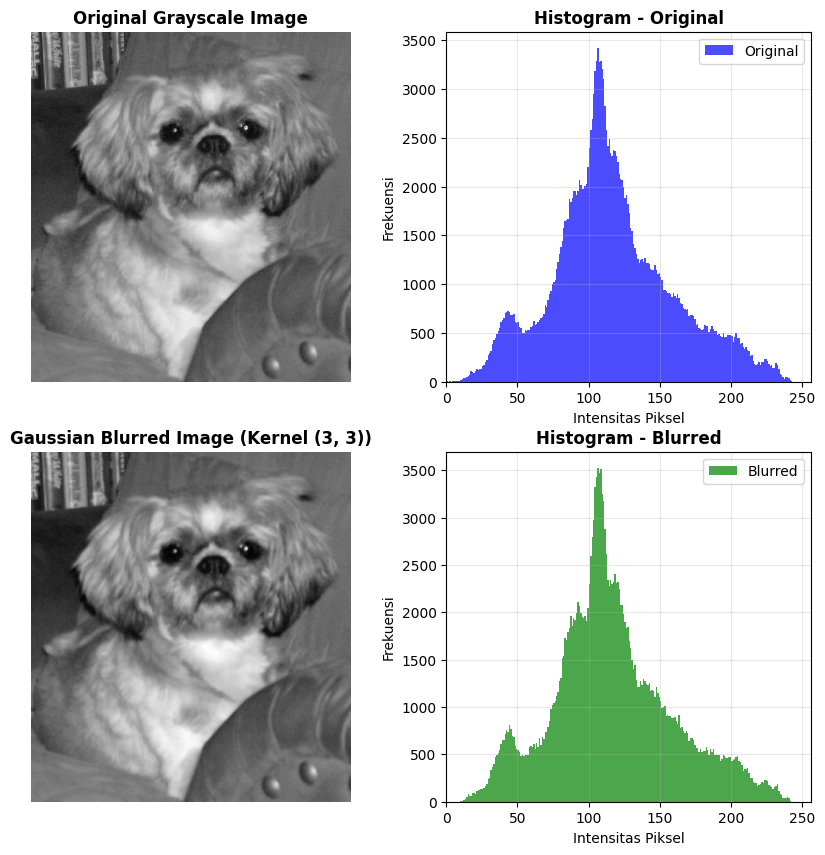

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compare_with_histogram(original, blurred, kernel_size=(3,3)):
    """Perbandingan original dan blurred dengan histogram"""
    fig = plt.figure(figsize=(16, 10))
    
    # Original Image
    ax1 = plt.subplot(2, 3, 1)
    ax1.imshow(original, cmap='gray')
    ax1.set_title('Original Grayscale Image', fontweight='bold', fontsize=12)
    ax1.axis('off')
    
    # Original Histogram
    ax2 = plt.subplot(2, 3, 2)
    ax2.hist(original.ravel(), bins=256, range=[0, 256], 
             color='blue', alpha=0.7, label='Original')
    ax2.set_title('Histogram - Original', fontweight='bold', fontsize=12)
    ax2.set_xlabel('Intensitas Piksel')
    ax2.set_ylabel('Frekuensi')
    ax2.set_xlim([0, 256])
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    
    # Blurred Image
    ax4 = plt.subplot(2, 3, 4)
    ax4.imshow(blurred, cmap='gray')
    ax4.set_title(f'Gaussian Blurred Image (Kernel {kernel_size})', 
                 fontweight='bold', fontsize=12)
    ax4.axis('off')
    
    # Blurred Histogram
    ax5 = plt.subplot(2, 3, 5)
    ax5.hist(blurred.ravel(), bins=256, range=[0, 256], 
             color='green', alpha=0.7, label='Blurred')
    ax5.set_title('Histogram - Blurred', fontweight='bold', fontsize=12)
    ax5.set_xlabel('Intensitas Piksel')
    ax5.set_ylabel('Frekuensi')
    ax5.set_xlim([0, 256])
    ax5.grid(True, alpha=0.3)
    ax5.legend()
    
# Gaussian Blur
blurred_image = cv2.GaussianBlur(img_gray, (3, 3), 0)

# Tampilkan dengan histogram
compare_with_histogram(img_gray, blurred_image, kernel_size=(3,3))

# Analisis Histogram pada Gaussian Blur

## Apa Itu Gaussian Blur?

Gaussian Blur adalah teknik untuk menghaluskan atau "memblur" gambar dengan cara merata-ratakan nilai piksel dengan tetangganya menggunakan distribusi Gaussian (bell curve). Ini seperti membuat gambar jadi sedikit "kabur" atau "soft focus".

**Cara Kerjanya:**
Setiap piksel diganti dengan rata-rata tertimbang dari piksel di sekitarnya. Piksel yang lebih dekat punya bobot lebih besar, piksel yang lebih jauh bobotnya lebih kecil - mengikuti kurva Gaussian.

**Parameter:**
- **Kernel size** (misalnya 3x3, 5x5, 7x7): Semakin besar kernel, semakin blur hasilnya
- Kernel 3x3 = blur ringan
- Kernel 15x15 = blur berat

## Perubahan pada Histogram

**Histogram Jadi Lebih "Smooth" atau Halus**

Ini adalah perubahan paling mencolok pada histogram setelah Gaussian Blur:

**Histogram Original:**
- Bisa punya banyak "spike" atau lonjakan kecil
- Bentuknya "kasar" dengan naik-turun yang tajam
- Banyak variasi frekuensi antar bin yang berdekatan
- Terlihat "noisy" atau "jagged"

**Histogram Blurred:**
- Spike-spike kecil menghilang atau berkurang
- Bentuknya lebih "smooth" atau halus
- Transisi antar bin lebih gradual
- Terlihat lebih "clean" dengan kurva yang lebih mulus

**Kenapa Ini Terjadi?**

Karena blur merata-ratakan piksel dengan tetangganya:
- Piksel dengan nilai ekstrem (sangat gelap atau sangat terang dibanding tetangganya) akan "ditarik" ke nilai rata-rata
- Perbedaan tajam antar piksel berkurang
- Variasi lokal berkurang
- Hasilnya: histogram lebih smooth karena nilai-nilai piksel jadi lebih "clustered" atau mengelompok

## Perubahan pada Mean (Rata-rata)

**Mean Hampir Tidak Berubah**

Ini ciri khas dari Gaussian Blur:
```
Mean Original ≈ Mean Blurred
```

Contoh:
- Mean original: 125.34
- Mean blurred: 125.31
- Selisih: sangat kecil (< 1)

**Kenapa Mean Tetap?**

Karena Gaussian Blur cuma menggeser nilai antar piksel, tidak menambah atau mengurangi total intensitas gambar. Ini seperti mengaduk cat - warnanya jadi lebih merata, tapi total jumlah cat tidak berubah.

Ini berbeda dari:
- Brightness adjustment: mean berubah besar
- Gamma correction: mean berubah signifikan
- Binary threshold: mean bisa berubah drastis

## Perubahan pada Standard Deviation (Kontras)

**Standard Deviation Menurun**

Ini perubahan terpenting dari Gaussian Blur:
```
StdDev Blurred < StdDev Original
```

Contoh:
- StdDev original: 45.67
- StdDev blurred (3x3): 43.21
- StdDev blurred (7x7): 38.54
- StdDev blurred (15x15): 30.12

Semakin besar kernel, semakin turun standard deviation.

**Apa Artinya?**

Standard deviation mengukur "sebaran" atau variasi nilai piksel. Kalau StdDev turun, artinya:
- Nilai-nilai piksel jadi lebih mirip satu sama lain
- Perbedaan antara area gelap dan terang berkurang
- **Kontras berkurang**
- Detail halus berkurang

**Kenapa Ini Terjadi?**

Blur merata-ratakan perbedaan. Bayangkan:
- Piksel A = 50, tetangganya B = 150 (perbedaan = 100)
- Setelah blur: A jadi 80, B jadi 120 (perbedaan = 40)
- Perbedaan berkurang → variasi berkurang → StdDev turun

## Histogram: Penyempitan di Ujung

**Extreme Values Berkurang**

Perhatikan ujung-ujung histogram:

**Histogram Original:**
- Mungkin ada beberapa piksel di nilai 0-10 (hitam pekat)
- Mungkin ada beberapa piksel di nilai 245-255 (putih terang)

**Histogram Blurred:**
- Piksel di nilai 0-10 berkurang atau hilang
- Piksel di nilai 245-255 berkurang atau hilang
- Nilai-nilai ekstrem "ditarik" ke tengah

**Kenapa?**

Piksel ekstrem (sangat gelap atau sangat terang) biasanya dikelilingi piksel yang tidak se-ekstrem itu. Saat di-blur:
- Piksel hitam (0) yang tetangganya abu-abu (128) akan jadi abu gelap (50-70)
- Piksel putih (255) yang tetangganya abu-abu (128) akan jadi abu terang (180-200)

Hasilnya: histogram "menjauh" dari ujung-ujung dan lebih menumpuk di tengah.

## Bentuk Histogram: Lebih "Bell-Shaped"

**Histogram Condong ke Bentuk Gaussian**

Menariknya, setelah di-blur dengan Gaussian, histogram sering jadi lebih mendekati bentuk Gaussian (bell curve) juga:

**Sebelum Blur:**
- Histogram bisa berbentuk apapun - bimodal, skewed, flat, dll
- Banyak irregularities

**Setelah Blur:**
- Histogram lebih smooth dan lebih mendekati bell curve
- Lebih "normal distribution"

Ini bukan kebetulan - ini adalah efek dari Central Limit Theorem dalam statistik. Saat kita rata-ratakan banyak nilai random, hasilnya cenderung mendekati distribusi normal.

## Perbandingan Kernel Size

**Kernel Kecil (3x3) - Blur Ringan:**

Histogram:
- Masih mirip original
- Smoothing minimal
- StdDev turun sedikit (misalnya dari 45 jadi 43)
- Extreme values masih ada
- Detail masih cukup terjaga

**Kernel Sedang (7x7) - Blur Moderate:**

Histogram:
- Jelas lebih smooth
- Spike-spike kecil hilang
- StdDev turun lebih banyak (misalnya dari 45 jadi 38)
- Extreme values berkurang signifikan
- Detail mulai kabur

**Kernel Besar (15x15) - Blur Berat:**

Histogram:
- Sangat smooth, hampir seperti kurva halus
- Hampir tidak ada variasi kecil
- StdDev turun drastis (misalnya dari 45 jadi 28)
- Extreme values hampir hilang
- Detail sangat kabur

**Tren Umum:**

Semakin besar kernel → histogram semakin smooth → StdDev semakin kecil → kontras semakin berkurang

## Overlay Histogram: Original vs Blurred

Kalau kita overlay kedua histogram:

**Yang Terlihat:**
1. **Bentuk dasar sama** - puncak masih di tempat yang mirip
2. **Histogram blurred lebih "gemuk" di tengah** - lebih banyak piksel di midtones
3. **Histogram blurred lebih "kurus" di ujung** - lebih sedikit piksel di extremes
4. **Kurva blurred lebih smooth** - tidak ada spike-spike tajam

**Interpretasi:**
Blur memindahkan distribusi dari ujung-ujung ke tengah, sambil menghaluskan variasi kecil.

## Noise Reduction di Histogram

**Salah Satu Tujuan Utama Blur**

Noise dalam gambar terlihat di histogram sebagai:
- Spike-spike kecil yang random
- Variasi tinggi di frekuensi antar bin yang berdekatan
- "Jagged" atau bergerigi

Setelah blur:
- Spike-spike noise hilang
- Histogram jadi smooth
- Noise berkurang signifikan

Ini kenapa Gaussian Blur sering dipakai sebagai preprocessing untuk noise reduction.

## Trade-off: Smoothness vs Detail

**Yang Kita Dapat (Dari Histogram):**
- ✓ Histogram lebih smooth dan clean
- ✓ Noise berkurang
- ✓ Extreme values berkurang
- ✓ Distribusi lebih uniform

**Yang Kita Korbankan:**
- ✗ Standard deviation turun (kontras berkurang)
- ✗ Detail halus hilang
- ✗ Edge (tepi) jadi blur
- ✗ Ketajaman berkurang

Dari histogram, kita bisa lihat trade-off ini lewat:
- StdDev yang turun = kontras turun
- Histogram yang smooth = detail berkurang

ed) tapi gambarnya sudah terlalu blur. Histogram tidak bisa tell us apakah detail yang hilang itu penting atau tidak.

## Kesimpulan

Gaussian Blur menghasilkan perubahan histogram yang khas dan mudah dikenali:

**Karakteristik Histogram Blurred:**
- Lebih smooth dan halus (spike-spike hilang)
- Mean hampir tidak berubah
- Standard deviation turun (kontras berkurang)
- Extreme values berkurang
- Bentuk lebih mendekati bell curve
- Range masih sama tapi distribusi lebih menumpuk di tengah

**Trade-off:**
- ✓ Noise berkurang (histogram lebih clean)
- ✓ Distribusi lebih uniform
- ✓ Bagus untuk preprocessing
- ✗ Kontras berkurang (StdDev turun)
- ✗ Detail hilang
- ✗ Ketajaman berkurang

**Dari Histogram, Kita Bisa:**
- Menilai seberapa kuat blur-nya (dari seberapa smooth histogram)
- Melihat pengurangan kontras (dari StdDev)
- Mendeteksi noise reduction (dari hilangnya spike-spike)
- Memilih kernel size yang tepat

**Yang Tidak Bisa Dilihat dari Histogram:**
- Spatial distribution dari blur
- Apakah detail penting yang hilang
- Kualitas visual hasil blur

Histogram adalah tools yang bagus untuk analisis Gaussian Blur, tapi harus dikombinasi dengan inspeksi visual untuk hasil terbaik.

### 2. Sharpening Filters (High-pass filters)
**Konsep:**
Sharpening filters digunakan untuk meningkatkan tepi dan detail dalam citra. Filter ini bekerja dengan menonjolkan perbedaan antara piksel pusat dan tetangganya, sehingga membuat tepi lebih jelas.

**Implementasi:**
```python
# Menggunakan kernel sharpening sebagai contoh
kernel = np.array([[0, -1, 0], [-1, 5,-1], [0, -1, 0]])
sharpened = cv2.filter2D(img, -1, kernel)
```

**`filter2D()`**
Fungsi ini menerapkan filter konvolusi pada citra menggunakan kernel yang ditentukan. Parameter pertama adalah citra input, parameter kedua adalah kedalaman output (-1 berarti sama dengan input), dan parameter ketiga adalah kernel filter.

Parameter:
- `img`: Citra input yang akan di-sharpen.
- `-1`: Kedalaman output (sama dengan input).
- `kernel`: Kernel sharpening yang digunakan untuk filter.

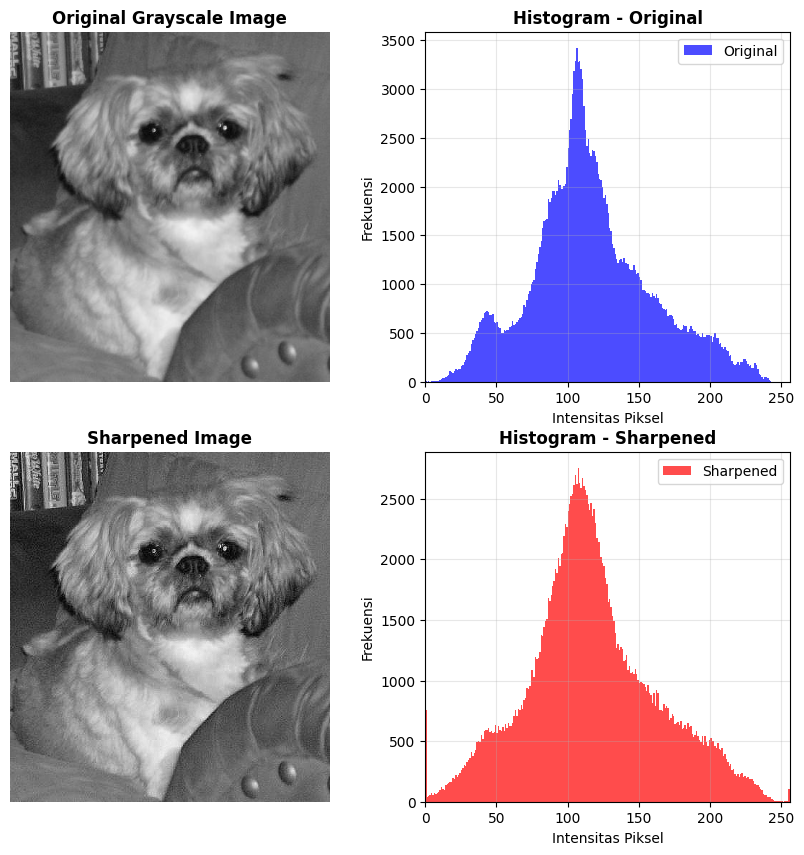

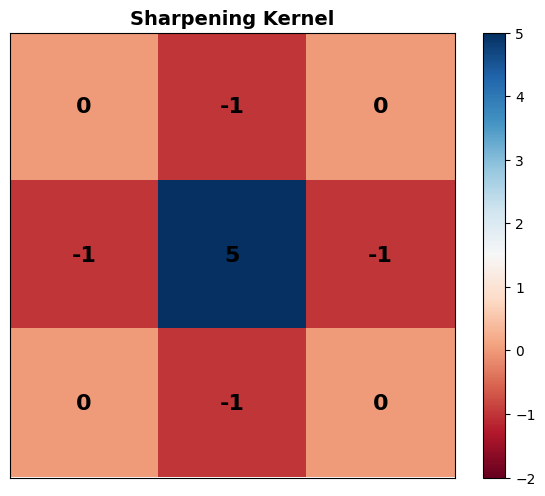

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compare_sharpening_with_histogram(original, sharpened, kernel):
    """Perbandingan original dan sharpened dengan histogram"""
    fig = plt.figure(figsize=(16, 10))
    
    # Original Image
    ax1 = plt.subplot(2, 3, 1)
    ax1.imshow(original, cmap='gray')
    ax1.set_title('Original Grayscale Image', fontweight='bold', fontsize=12)
    ax1.axis('off')
    
    # Original Histogram
    ax2 = plt.subplot(2, 3, 2)
    ax2.hist(original.ravel(), bins=256, range=[0, 256], 
             color='blue', alpha=0.7, label='Original')
    ax2.set_title('Histogram - Original', fontweight='bold', fontsize=12)
    ax2.set_xlabel('Intensitas Piksel')
    ax2.set_ylabel('Frekuensi')
    ax2.set_xlim([0, 256])
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    
    
    # Sharpened Image
    ax4 = plt.subplot(2, 3, 4)
    ax4.imshow(sharpened, cmap='gray')
    ax4.set_title('Sharpened Image', fontweight='bold', fontsize=12)
    ax4.axis('off')
    
    # Sharpened Histogram
    ax5 = plt.subplot(2, 3, 5)
    ax5.hist(sharpened.ravel(), bins=256, range=[0, 256], 
             color='red', alpha=0.7, label='Sharpened')
    ax5.set_title('Histogram - Sharpened', fontweight='bold', fontsize=12)
    ax5.set_xlabel('Intensitas Piksel')
    ax5.set_ylabel('Frekuensi')
    ax5.set_xlim([0, 256])
    ax5.grid(True, alpha=0.3)
    ax5.legend()
    
    # Kernel visualization
    fig3, ax = plt.subplots(1, 1, figsize=(6, 5))
    im = ax.imshow(kernel, cmap='RdBu', vmin=-2, vmax=5)
    ax.set_title('Sharpening Kernel', fontweight='bold', fontsize=14)
    
    # Add values to kernel cells
    for i in range(kernel.shape[0]):
        for j in range(kernel.shape[1]):
            text = ax.text(j, i, kernel[i, j],
                          ha="center", va="center", color="black", 
                          fontsize=16, fontweight='bold')
    
    ax.set_xticks([])
    ax.set_yticks([])
    plt.colorbar(im, ax=ax)
    plt.tight_layout()
    plt.show()

# Sharpening kernel
kernel = np.array([[0, -1, 0], 
                   [-1, 5, -1], 
                   [0, -1, 0]])

sharpened_image = cv2.filter2D(img_gray, -1, kernel)

# Tampilkan dengan histogram
compare_sharpening_with_histogram(img_gray, sharpened_image, kernel)

# Analisis Histogram pada Image Sharpening

## Apa Itu Sharpening?

Sharpening adalah teknik untuk meningkatkan ketajaman gambar dengan cara memperkuat edge (tepi) dan detail halus. Ini adalah kebalikan dari blurring - kalau blur membuat gambar lebih halus, sharpening membuat gambar lebih tajam dan detail lebih menonjol.

**Cara Kerjanya:**
Sharpening menggunakan kernel konvolusi yang meningkatkan perbedaan antara piksel dengan tetangganya. Kernel yang umum dipakai:
```
[  0  -1   0 ]
[ -1   5  -1 ]
[  0  -1   0 ]
```

Angka tengah (5) adalah piksel target, angka -1 adalah tetangganya. Formula efektifnya:
```
Sharpened = Original + (Original - Blurred)
```

Atau bisa dilihat sebagai:
```
Sharpened = Original + Edge Enhancement
```

## Perubahan Drastis pada Histogram

**Histogram Jadi Lebih "Jagged" atau Bergerigi**

Ini adalah perubahan paling mencolok - berlawanan total dengan Gaussian Blur:

**Histogram Original:**
- Bentuk relatif smooth
- Transisi antar bin cukup halus
- Variasi moderate

**Histogram Sharpened:**
- Lebih "spiky" atau banyak lonjakan-lonjakan kecil
- Bentuk lebih "kasar" atau jagged
- Variasi tinggi antar bin yang berdekatan
- Terlihat lebih "noisy" secara visual

**Kenapa Ini Terjadi?**

Sharpening meningkatkan perbedaan lokal:
- Piksel yang lebih terang dari tetangganya jadi lebih terang lagi
- Piksel yang lebih gelap dari tetangganya jadi lebih gelap lagi
- Perbedaan kecil diperbesar
- Hasilnya: lebih banyak variasi nilai piksel → histogram lebih jagged

## Perubahan pada Mean (Rata-rata)

**Mean Hampir Tidak Berubah (Tapi Bisa Sedikit Bergeser)**
```
Mean Sharpened ≈ Mean Original
```

Contoh:
- Mean original: 125.34
- Mean sharpened: 125.67
- Selisih: sangat kecil

**Kenapa Mean Relatif Tetap?**

Kalau kita jumlahkan semua nilai di kernel sharpening:
```
0 + (-1) + 0 + (-1) + 5 + (-1) + 0 + (-1) + 0 = 1
```

Jumlahnya 1 (atau mendekati 1 tergantung kernel), yang artinya sharpening tidak menambah atau mengurangi total brightness secara signifikan. Dia cuma "redistribute" intensitas untuk meningkatkan kontras lokal.

Tapi beda dengan blur yang mean-nya benar-benar sama, sharpening bisa sedikit menggeser mean karena adanya clipping di ujung (piksel yang melebihi 255 atau kurang dari 0).

## Perubahan pada Standard Deviation (Kontras)

**Standard Deviation Meningkat**

Ini adalah perubahan terpenting dan paling signifikan:
```
StdDev Sharpened > StdDev Original
```

Contoh:
- StdDev original: 45.67
- StdDev sharpened (mild): 48.23
- StdDev sharpened (standard): 52.81
- StdDev sharpened (strong): 58.94

Semakin kuat sharpening, semakin tinggi standard deviation.

**Apa Artinya?**

Standard deviation yang naik berarti:
- Nilai-nilai piksel lebih tersebar
- Perbedaan antara area gelap dan terang meningkat
- **Kontras meningkat**
- Variasi lokal meningkat
- Detail lebih menonjol

**Kenapa Ini Terjadi?**

Sharpening memperbesar perbedaan lokal. Bayangkan:
- Piksel A = 100, tetangganya rata-rata 110
- Original perbedaan = 10
- Setelah sharpen: A jadi 95, tetangga jadi 115
- Perbedaan sekarang = 20

Perbedaan meningkat → variasi meningkat → StdDev naik

**Perbandingan dengan Operasi Lain:**

| Operasi | Efek pada StdDev |
|---------|------------------|
| Gaussian Blur | StdDev turun ↓ |
| **Sharpening** | **StdDev naik ↑** |
| Low Contrast | StdDev turun ↓ |
| High Contrast | StdDev naik ↑ |

Sharpening dan High Contrast sama-sama meningkatkan StdDev, tapi caranya berbeda:
- High Contrast: scale semua piksel dari mean
- Sharpening: enhance perbedaan lokal

## Histogram: Perluasan di Ujung (Edge Stretching)

**Extreme Values Bertambah**

Perhatikan ujung-ujung histogram:

**Histogram Original:**
- Sedikit atau tidak ada piksel di nilai 0-5
- Sedikit atau tidak ada piksel di nilai 250-255

**Histogram Sharpened:**
- Lebih banyak piksel di nilai 0-10 (hitam pekat)
- Lebih banyak piksel di nilai 245-255 (putih terang)
- Ada "spike" di nilai 0 dan 255 (tanda clipping)

**Kenapa?**

Sharpening memperbesar perbedaan, yang membuat:
- Piksel yang sudah agak gelap jadi lebih gelap lagi (bisa sampai 0)
- Piksel yang sudah agak terang jadi lebih terang lagi (bisa sampai 255)
- Edge yang tajam menghasilkan transisi ekstrem dari gelap ke terang

**Clipping Problem:**

Ini adalah masalah utama sharpening. Saat nilai piksel melebihi range:
- Nilai < 0 → di-clip jadi 0
- Nilai > 255 → di-clip jadi 255

Di histogram, ini terlihat sebagai spike tinggi di nilai 0 dan 255. Semakin banyak clipping, semakin banyak detail yang hilang.

## Bentuk Histogram: Lebih Lebar dan Irregular

**Histogram Spread Keluar**

**Sebelum Sharpening:**
- Histogram mungkin terpusat di range 50-200
- Bentuk relatif compact

**Setelah Sharpening:**
- Histogram melebar ke range 0-255
- Distribusi lebih spread out
- Tidak compact lagi

**Irregularity Meningkat:**

Histogram sharpened punya karakteristik:
- Banyak puncak-puncak kecil (multi-modal)
- Lembah dan puncak yang tidak teratur
- Tidak smooth seperti histogram original
- Terlihat lebih "chaotic"

Ini adalah trade-off: detail meningkat, tapi histogram jadi lebih irregular dan sulit diinterpretasi.

## Noise Amplification di Histogram

**Masalah Besar: Sharpening Juga Memperkuat Noise**

Kalau gambar original punya noise, sharpening akan memperkuat noise tersebut:

**Histogram Original dengan Noise:**
- Spike-spike kecil dari noise
- Relatif tersembunyi

**Histogram Sharpened:**
- Spike-spike noise jadi lebih besar
- Noise jadi lebih terlihat dan mengganggu
- Histogram jadi lebih jagged karena noise

**Kenapa?**

Sharpening tidak bisa membedakan antara:
- Detail yang kita inginkan (edge, texture)
- Noise yang kita tidak inginkan

Keduanya adalah "variasi lokal", jadi keduanya sama-sama diperkuat.

**Solusi:**

Sering kali gambar di-blur dulu (untuk kurangi noise), baru di-sharpen. Urutan:
1. Original → Gaussian Blur (kurangi noise)
2. Blurred → Sharpening (tambah detail)
3. Result: sharp tapi tidak terlalu noisy

## Overlay Histogram: Original vs Sharpened

Kalau kita overlay kedua histogram:

**Yang Terlihat:**

1. **Bentuk dasar mirip** - puncak masih di tempat yang sama
2. **Histogram sharpened lebih lebar** - spread ke ujung-ujung
3. **Histogram sharpened lebih irregular** - lebih banyak variasi kecil
4. **Spike di ujung** - clipping di 0 dan 255
5. **Area tengah lebih "kurus"** - piksel di midtones berkurang karena bergeser ke extreme

**Interpretasi:**

Sharpening "pull" distribusi dari tengah ke ujung-ujung, sambil meningkatkan variasi lokal. Ini kebalikan dari blur yang "push" dari ujung ke tengah dan mengurangi variasi.

## Perbandingan Intensitas Sharpening

**Mild Sharpening (Kernel Lembut):**

Kernel: `[[0, -0.5, 0], [-0.5, 3, -0.5], [0, -0.5, 0]]`

Histogram:
- Sedikit lebih jagged dari original
- StdDev naik sedikit
- Clipping minimal atau tidak ada
- Detail meningkat tapi natural

**Standard Sharpening (Kernel Medium):**

Kernel: `[[0, -1, 0], [-1, 5, -1], [0, -1, 0]]`

Histogram:
- Jelas lebih jagged
- StdDev naik signifikan
- Ada clipping tapi masih terkontrol
- Detail meningkat dengan jelas

**Strong Sharpening (Kernel Kuat):**

Kernel: `[[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]]`

Histogram:
- Sangat jagged dan irregular
- StdDev naik drastis
- Banyak clipping (spike tinggi di 0 dan 255)
- Detail over-emphasized, terlihat tidak natural
- Noise sangat terlihat

**Tren Umum:**

Semakin kuat sharpening → StdDev semakin tinggi → histogram semakin jagged → clipping semakin banyak

## Clipping Detection dari Histogram

**Cara Mendeteksi Over-Sharpening:**

Lihat histogram di ujung-ujung:

**Histogram Sehat:**
- Spike di 0 dan 255 kecil atau tidak ada
- Distribusi smooth di ujung
- Tidak ada "wall" vertikal di 0 atau 255

**Histogram Over-Sharpened:**
- Spike tinggi di 0 (banyak piksel hitam pekat)
- Spike tinggi di 255 (banyak piksel putih terang)
- "Wall effect" - histogram seperti menabrak dinding di ujung

Kalau lebih dari 1-2% piksel ter-clipping, sharpening terlalu kuat.

**Rumus Sederhana:**
```
Clipping % = (Jumlah piksel di 0 + Jumlah piksel di 255) / Total piksel × 100
```

Idealnya < 1%

## Trade-off: Sharpness vs Naturalness

**Yang Kita Dapat (Dari Histogram):**
- ✓ StdDev naik (kontras meningkat)
- ✓ Detail lebih menonjol
- ✓ Edge lebih jelas
- ✓ Gambar lebih "crisp"

**Yang Kita Korbankan:**
- ✗ Noise ikut terperkuat (histogram lebih jagged)
- ✗ Clipping di ujung (spike di 0 dan 255)
- ✗ Hasil bisa terlihat tidak natural kalau terlalu kuat
- ✗ Histogram jadi lebih sulit dianalisis

Dari histogram, kita bisa monitor trade-off ini:
- StdDev naik = good (kontras meningkat)
- Spike di ujung = bad (clipping, kehilangan detail)
- Histogram terlalu jagged = warning (bisa over-sharpened atau noise tinggi)

## Kesimpulan

Sharpening menghasilkan perubahan histogram yang khas dan berlawanan dengan blur:

**Karakteristik Histogram Sharpened:**
- Lebih jagged dan irregular (banyak spike kecil)
- Mean hampir tidak berubah
- Standard deviation naik (kontras meningkat)
- Extreme values bertambah (spread ke ujung)
- Ada clipping di 0 dan 255 (spike di ujung)
- Bentuk lebih lebar dan irregular

**Trade-off:**
- ✓ Kontras meningkat (StdDev naik)
- ✓ Detail lebih jelas
- ✓ Edge lebih tajam
- ✗ Noise terperkuat (histogram jagged)
- ✗ Clipping (detail hilang di extreme)
- ✗ Bisa terlihat unnatural

**Dari Histogram, Kita Bisa:**
- Monitor seberapa kuat sharpening (dari StdDev)
- Deteksi over-sharpening (dari clipping)
- Menilai apakah noise jadi masalah (dari jaggedness)
- Memilih intensitas sharpening yang tepat

**Yang Tidak Bisa Dilihat dari Histogram:**
- Spatial distribution dari sharpening
- Halo effect
- Apakah hasilnya natural atau tidak
- Kualitas visual overall

Histogram adalah tools yang sangat berguna untuk monitor sharpening, terutama untuk deteksi over-sharpening lewat clipping. Tapi harus dikombinasi dengan inspeksi visual untuk hasil optimal.

### 3. Edge Detection Filters
**Konsep:**
Edge detection filters digunakan untuk mendeteksi tepi dalam citra dengan menyoroti perubahan tajam dalam intensitas piksel. Filter ini sering digunakan dalam analisis citra untuk mengenali objek.

**Implementasi:**
```python
# Menggunakan kernel edge detection sebagai contoh
kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
edges = cv2.filter2D(img, -1, kernel)
```	

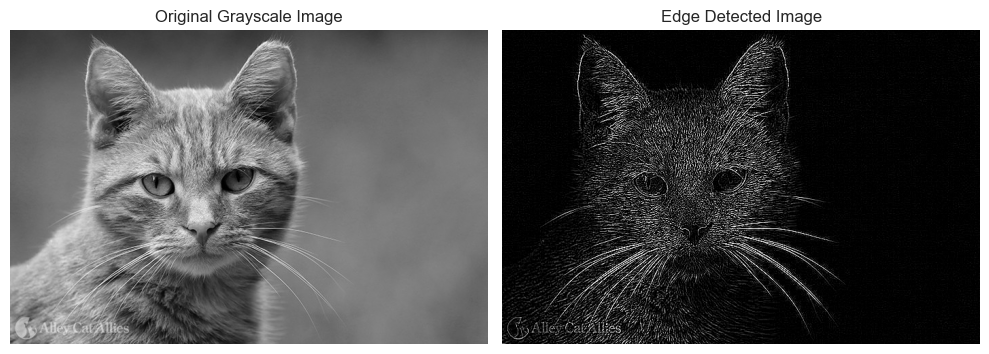

In [16]:
kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
edge_detected_image = cv2.filter2D(img_gray, -1, kernel)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(img_gray, cmap='gray')
axes[0].set_title("Original Grayscale Image")
axes[0].axis('off')

axes[1].imshow(edge_detected_image, cmap='gray')
axes[1].set_title("Edge Detected Image")
axes[1].axis('off')

plt.tight_layout()
plt.show()

### 4. Embossing Filters
**Konsep:**
Embossing filters memberikan efek timbul pada citra dengan menyoroti tepi dan memberikan bayangan. Filter ini menciptakan ilusi kedalaman dengan mengubah intensitas piksel berdasarkan tetangganya.

**Implementasi:**
```python
# Menggunakan kernel embossing sebagai contoh
kernel = np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]])
embossed = cv2.filter2D(img, -1, kernel)
```

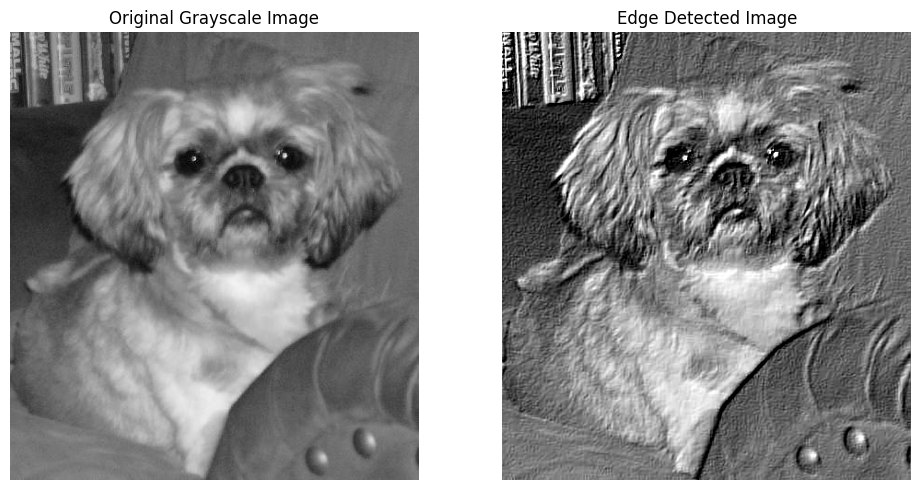

In [7]:
kernel = np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]])
edge_detected_image = cv2.filter2D(img_gray, -1, kernel)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img_gray, cmap='gray')
axes[0].set_title("Original Grayscale Image")
axes[0].axis('off')

axes[1].imshow(edge_detected_image, cmap='gray')
axes[1].set_title("Edge Detected Image")
axes[1].axis('off')

plt.tight_layout()
plt.show()

### 5. Custom Convolution Filters
**Konsep:**
Custom convolution filters memungkinkan pengguna untuk membuat kernel mereka sendiri sesuai dengan kebutuhan spesifik. Ini memberikan fleksibilitas dalam menerapkan berbagai efek pada citra.
**Implementasi:**
```python
# Membuat kernel custom sebagai contoh
custom_kernel = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
custom_filtered = cv2.filter2D(img, -1, custom_kernel)
```

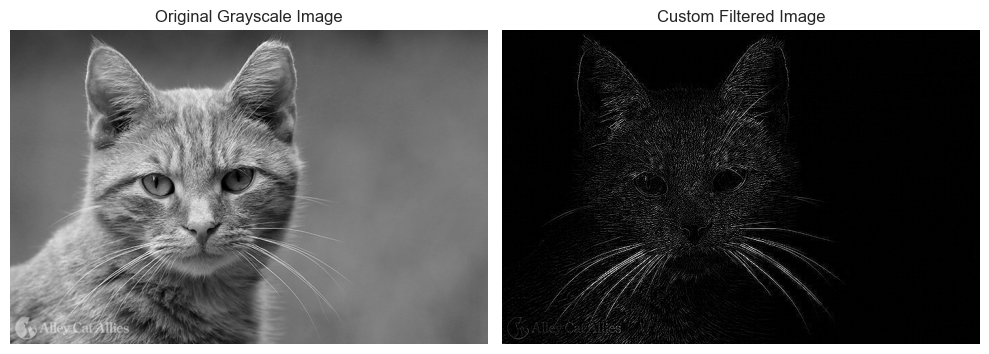

In [19]:
custom_kernel = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
custom_filtered = cv2.filter2D(img_gray, -1, custom_kernel)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img_gray, cmap='gray')
axes[0].set_title("Original Grayscale Image")
axes[0].axis('off')

axes[1].imshow(custom_filtered, cmap='gray')
axes[1].set_title("Custom Filtered Image")
axes[1].axis('off')

plt.tight_layout()
plt.show()